# Student Marks Prediction Using Linear Regression

In [1]:
import pandas as pd

In [2]:
s = pd.read_csv("StudentMarksDataset.csv")
s

,Std_RollNo,Std_Name,Std_Branch,Std_Course,Std_StudyHours,Std_Marks
0,240415,Tanya Gautam,MC,B.Sc 1st year,6.83,78.50
1,240416,Udit Sagan,MC,B.Sc 1st year,6.56,76.74
2,240417,Kratika Sharma,PM,B.Sc 1st year,NaN,78.68
3,240418,Rakesh Kumar,PM,B.Sc 1st year,5.67,71.82
4,240419,Ritika Katara,PM,B.Sc 1st year,8.67,84.19
...,...,...,...,...,...,...
195,240609,PAYAL,CS,B.Tech 4th year,7.53,81.67
196,240610,SACHIN,CS,B.Tech 4th year,8.56,84.68
197,240611,DOLLY AGRAWAL,ZOOLOGY,B.Tech 4th year,8.94,86.75
198,240612,ROHIT YADAV,ZOOLOGY,B.Tech 4th year,6.60,78.05


In [3]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Std_RollNo      200 non-null    int64  
 1   Std_Name        200 non-null    object 
 2   Std_Branch      197 non-null    object 
 3   Std_Course      200 non-null    object 
 4   Std_StudyHours  195 non-null    float64
 5   Std_Marks       200 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB


In [4]:
s.columns[s.isna().any()]

Index(['Std_Branch', 'Std_StudyHours'], dtype='object')

# data cleaning

In [5]:
d = s.drop(['Std_RollNo', 'Std_Name', 'Std_Branch','Std_Course'], axis=1)
d

,Std_StudyHours,Std_Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


# data exploration

In [6]:
d.describe()

,Std_StudyHours,Std_Marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


# feature selection/engineering

In [7]:
x=d[['Std_StudyHours']]
x
y=d.iloc[:,1]
y

0      78.50
1      76.74
2      78.68
3      71.82
4      84.19
       ...  
195    81.67
196    84.68
197    86.75
198    78.05
199    83.50
Name: Std_Marks, Length: 200, dtype: float64

# model selection

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train

,Std_StudyHours
79,5.88
197,8.94
38,5.62
24,5.45
122,NaN
...,...
106,5.34
14,8.19
92,5.44
179,7.26


In [10]:
x_test

,Std_StudyHours
95,6.09
15,6.55
30,8.13
158,7.53
128,6.38
115,5.79
69,8.25
170,5.19
174,5.39
45,6.18


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
d = d.dropna() 

In [13]:
x = d[['Std_StudyHours']]
y = d.iloc[:,1]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred=lr.predict(x_test)
y_pred

array([81.08020278, 83.51692646, 81.27359355, 82.08583477, 71.64273328,
       74.77566373, 85.41215599, 75.4718705 , 73.26721574, 78.41141018,
       78.95290433, 80.53870863, 77.48313449, 76.36146803, 81.62169693,
       76.09072096, 70.63710129, 71.75876774, 85.45083414, 80.34531786,
       78.48876648, 82.97543231, 70.48238867, 70.25031975, 81.00284647,
       72.8804342 , 82.78204154, 74.42756035, 71.75876774, 78.83686987,
       83.01411046, 76.24543357, 81.66037508, 85.41215599, 71.21727359,
       71.06256098, 79.57175479, 79.30100771, 74.23416958])

In [17]:
y_test

142    82.55
17     85.11
159    80.72
99     82.30
70     71.80
157    75.52
57     86.65
16     76.04
115    74.44
114    78.42
189    79.87
19     80.58
84     77.29
10     75.37
168    82.68
120    76.20
71     71.79
116    70.34
197    86.75
123    79.53
127    77.65
148    82.02
68     69.27
47     70.11
162    79.17
118    73.61
69     82.79
95     76.48
32     71.10
104    77.55
121    82.69
77     77.33
25     83.33
176    85.96
131    71.86
173    70.40
20     82.18
172    77.78
75     72.33
Name: Std_Marks, dtype: float64

In [18]:
from sklearn.metrics import r2_score

In [19]:
 r2_score(y_test,y_pred)

0.9491213668579527

# data visualization

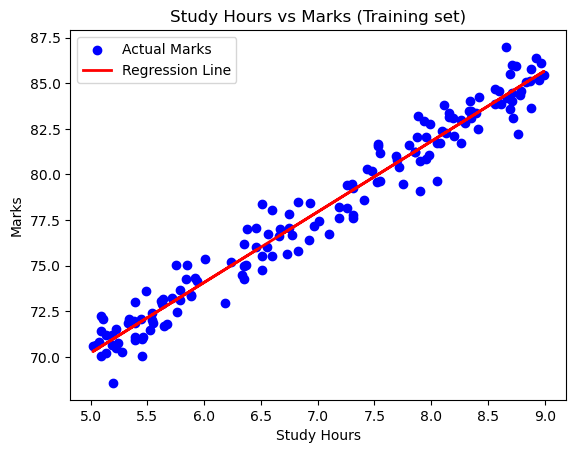

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color='blue', label='Actual Marks')
plt.plot(x_train, lr.predict(x_train), color='red', linewidth=2, label='Regression Line')
plt.title('Study Hours vs Marks (Training set)')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()